# Homework 2

### Due by 11:59pm on 2 November ( submit within Portfolio )

For each instruction, show your code and execution within the Jupyter Notebook.

In [71]:
#Instruction1: import library and settings

%matplotlib inline
from collections import defaultdict
import json

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import cycler

from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl

#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
# rcParams['axes.color_cycle'] = dark2_colors
rcParams['axes.prop_cycle'] = cycler.cycler(color=dark2_colors)
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

#Instruction2: Describe your data set

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)


In [72]:
#Instruction3: Import your dataset and print then number of rows and columns
import pandas as pd
df = pd.read_csv("data/pulsar_stars.csv")
print(len(df.columns))
print(len(df.index))

9
17898


In [73]:
#Instruction4: Show the names of the features/attributes of your dataset
print(df.columns)

Index(['Mean of the integrated profile', 'Standard deviation of the integrated profile', 'Excess kurtosis of the integrated profile', 'Skewness of the integrated profile', 'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve', 'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve', 'target_class'], dtype='object')


In [74]:
df.head()

Mean of the integrated profile  Standard deviation of the integrated profile  Excess kurtosis of the integrated profile  Skewness of the integrated profile  Mean of the DM-SNR curve  Standard deviation of the DM-SNR curve  Excess kurtosis of the DM-SNR curve  Skewness of the DM-SNR curve  target_class
0                      140.562500                                     55.683782                                  -0.234571                           -0.699648                  3.199833                               19.110426                             7.975532                     74.242225             0
1                      102.507812                                     58.882430                                   0.465318                           -0.515088                  1.677258                               14.860146                            10.576487                    127.393580             0
2                      103.015625                                     39.341649                                   0.323328                            1.051164                  3.121237                               21.744669                             7.735822                     63.171909             0
3                      136.750000                                     57.178449                                  -0.068415                           -0.636238                  3.642977                               20.959280                             6.896499                     53.593661             0
4                       88.726562                                     40.672225                                   0.600866                            1.123492                  1.178930                               11.468720                            14.269573                    252.567306             0

In [75]:
df = df.rename(columns={'Mean of the integrated profile': 'IP_mean',
                        'Standard deviation of the integrated profile': 'IP_std',
                        'Excess kurtosis of the integrated profile': 'IP_kurt',
                        'Skewness of the integrated profile': 'IP_skew',
                        'Mean of the DM-SNR curve': 'DMSNR_mean',
                        'Standard deviation of the DM-SNR curve': 'DMSNR_std',
                        'Excess kurtosis of the DM-SNR curve': 'DMSNR_kurt',
                        'Skewness of the DM-SNR curve': 'DMSNR_skew',
                        'target_class': 'target'})

In [76]:
df.head()

IP_mean     IP_std   IP_kurt   IP_skew  DMSNR_mean  DMSNR_std  DMSNR_kurt  DMSNR_skew  target
0  140.562500  55.683782 -0.234571 -0.699648    3.199833  19.110426    7.975532   74.242225       0
1  102.507812  58.882430  0.465318 -0.515088    1.677258  14.860146   10.576487  127.393580       0
2  103.015625  39.341649  0.323328  1.051164    3.121237  21.744669    7.735822   63.171909       0
3  136.750000  57.178449 -0.068415 -0.636238    3.642977  20.959280    6.896499   53.593661       0
4   88.726562  40.672225  0.600866  1.123492    1.178930  11.468720   14.269573  252.567306       0

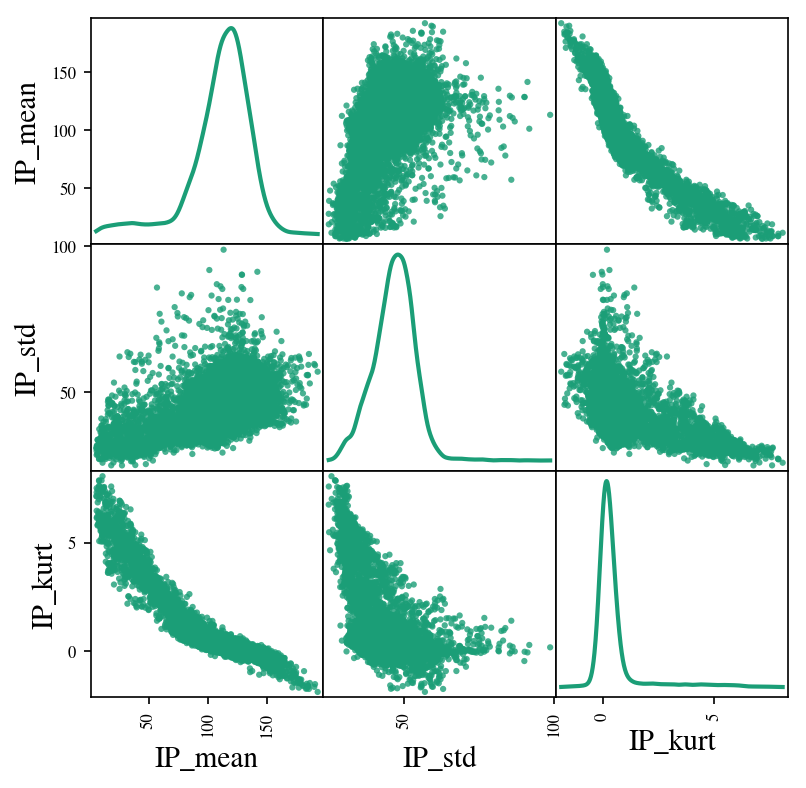

In [77]:
#Instruction5: use a SPLOM to visualize some columns of this dataset. In Panda's the SPLOM is a one-liner.

smaller_frame=df[['IP_mean', 'IP_std', 'IP_kurt']]
from pandas.plotting import scatter_matrix
axeslist=scatter_matrix(smaller_frame, alpha=0.8, figsize=(6, 6), diagonal="kde")
for ax in axeslist.flatten():
    ax.grid(False)

In [78]:
#Instruction6:Is there any strong correlation between any of the features.  Run a correlation analysis on the three features.

smaller_frame.corr()

IP_mean    IP_std   IP_kurt
IP_mean  1.000000  0.547137 -0.873898
IP_std   0.547137  1.000000 -0.521435
IP_kurt -0.873898 -0.521435  1.000000

In [79]:
#Instruction7: Carry out the regression, first standardizing our variables. This is strictly not necessary, but we are doing it as we wish to play around with PCA. 
#Since scikit-learn wants a n_sample rows times n_features matrix, we need to reshape the x variable. We store both an _vec variable, which is easier to plot with, 
#as well as the reshaped variable. 

from sklearn.linear_model import LinearRegression
X_HD=smaller_frame[['IP_mean', 'IP_std']].values
X_HDn=(X_HD - X_HD.mean(axis=0))/X_HD.std(axis=0)
radius_std_vec=X_HDn[:,0]
radius_std=radius_std_vec.reshape(-1,1)
texture_std_vec=X_HDn[:,1]
texture_std=texture_std_vec.reshape(-1,1)

In [80]:
#Instruction8: Split the data into a training set and a testing set. By default, 25% of the data is reserved for testing. 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(radius_std, texture_std_vec)

In [81]:
#Instrusction9: Use the training set for the fit, and find what our predictions ought to be on both the training and test set.

clf1 = LinearRegression()
clf1.fit(X_train, y_train)
predicted_train = clf1.predict(X_train)
predicted_test = clf1.predict(X_test)
trains=X_train.reshape(1,-1).flatten()
tests=X_test.reshape(1,-1).flatten()
print (clf1.coef_, clf1.intercept_)

[0.54196899] 0.0018418926296405328


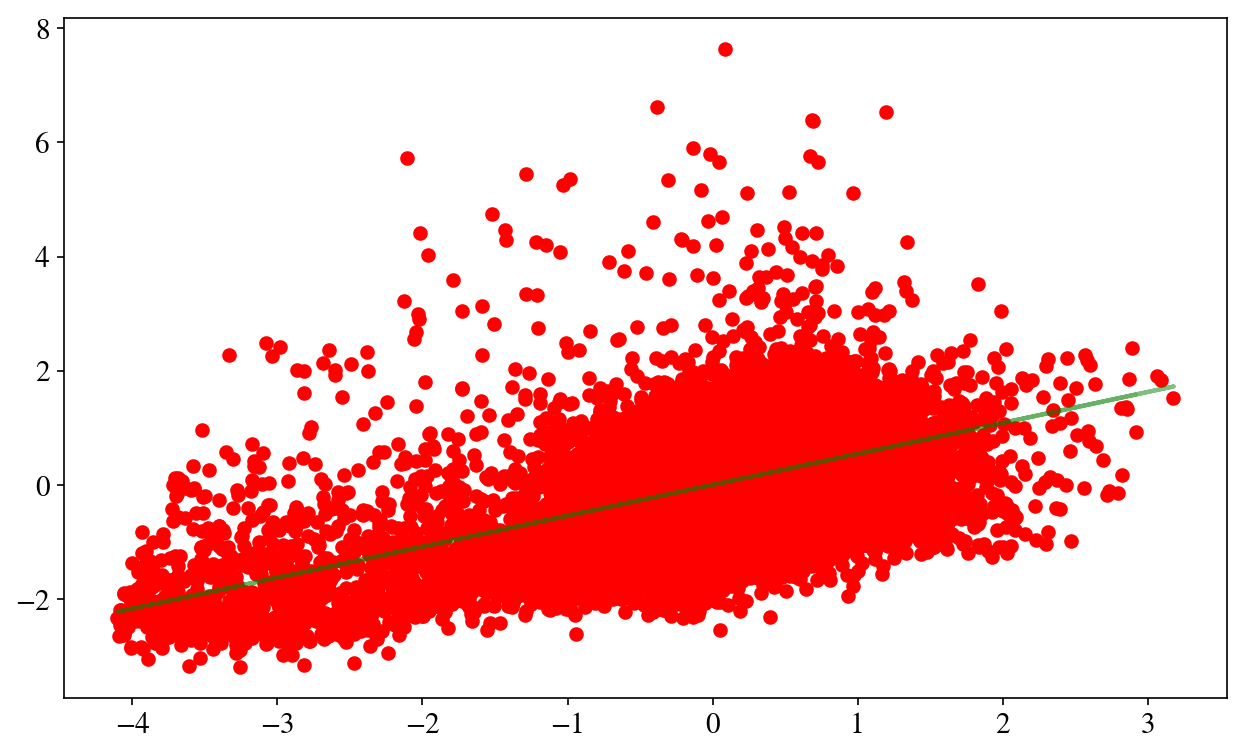

In [89]:
#Instruction10: Plot the scatter against the fit for both training and test data.

plt.scatter(radius_std, texture_std_vec,c='r');
plt.plot(trains, predicted_train, c='g', alpha=0.5);
plt.plot(tests, predicted_test, c='g', alpha=0.2);

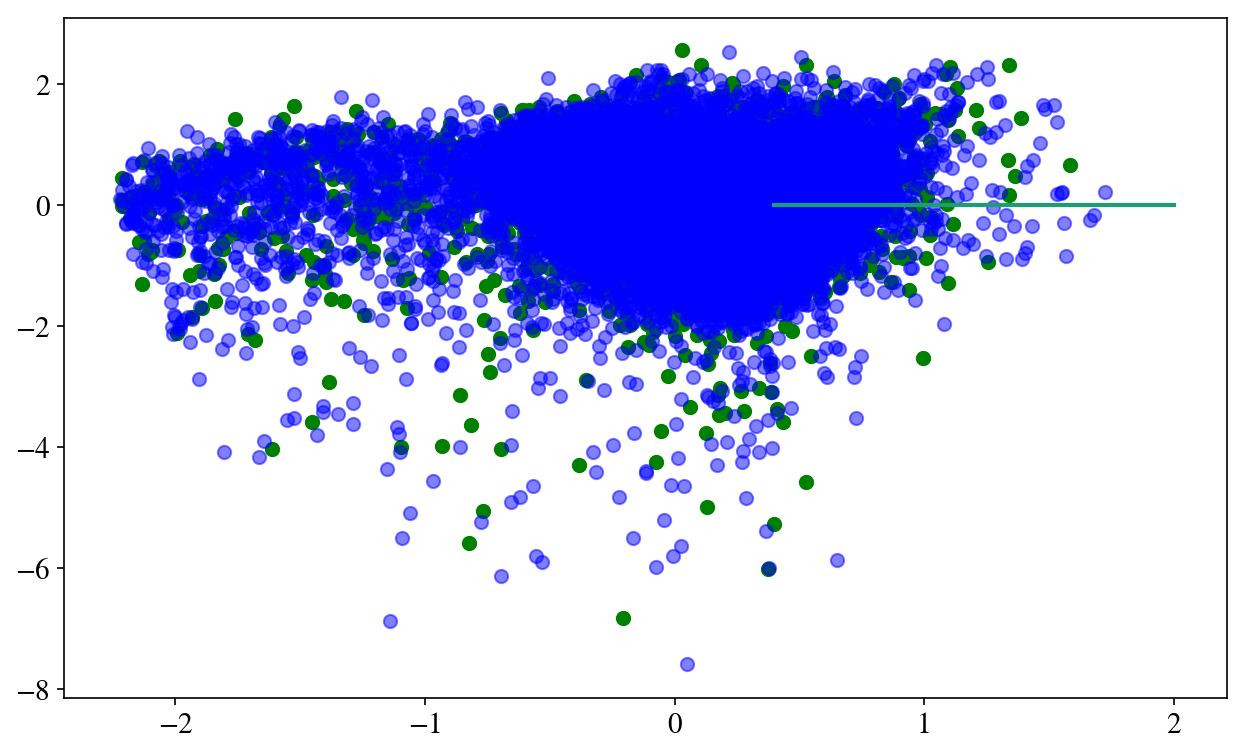

In [92]:
#Instruction11: Look at the residuals, again on both sets.

plt.scatter(predicted_test, predicted_test- y_test, c='g', s=40);
plt.scatter(predicted_train, predicted_train- y_train, c='b', s=40, alpha=0.5);
plt.plot([0.4,2],[0,0]);

In [93]:
#Instruction12: Take the standarddized data and do a 2-D PCA on it. 
#Here we do not seek to accomplish a dimensional reduction, but to understand the variance structure of the data.

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X_HDn)
print (pca.explained_variance_ratio_)

[0.77356846 0.22643154]


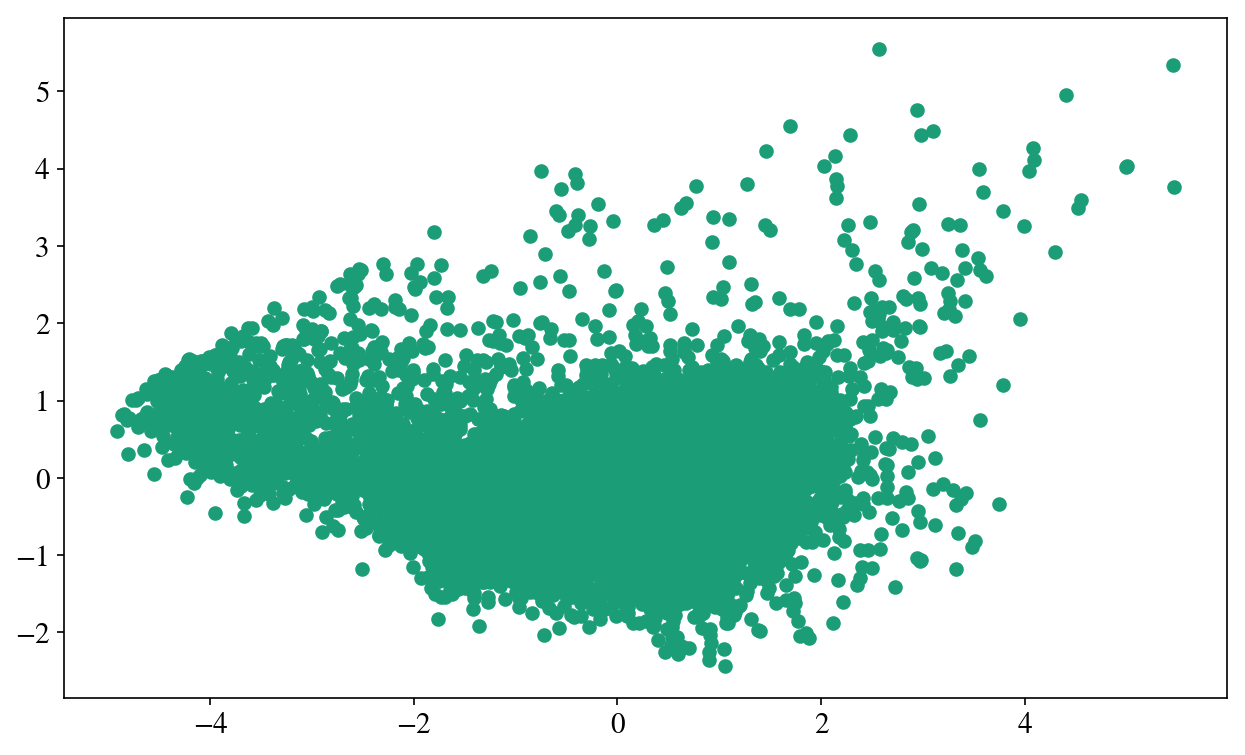

In [94]:
plt.scatter(X[:, 0], X[:, 1]);

In [95]:
#Instruction13: Reconstruct the original data from only the first component, setting the others to 0.

pca1 = PCA(n_components=1) # only keep one dimension!
X_E = pca1.fit_transform(X_HDn)
X_reconstructed = pca1.inverse_transform(X_E)

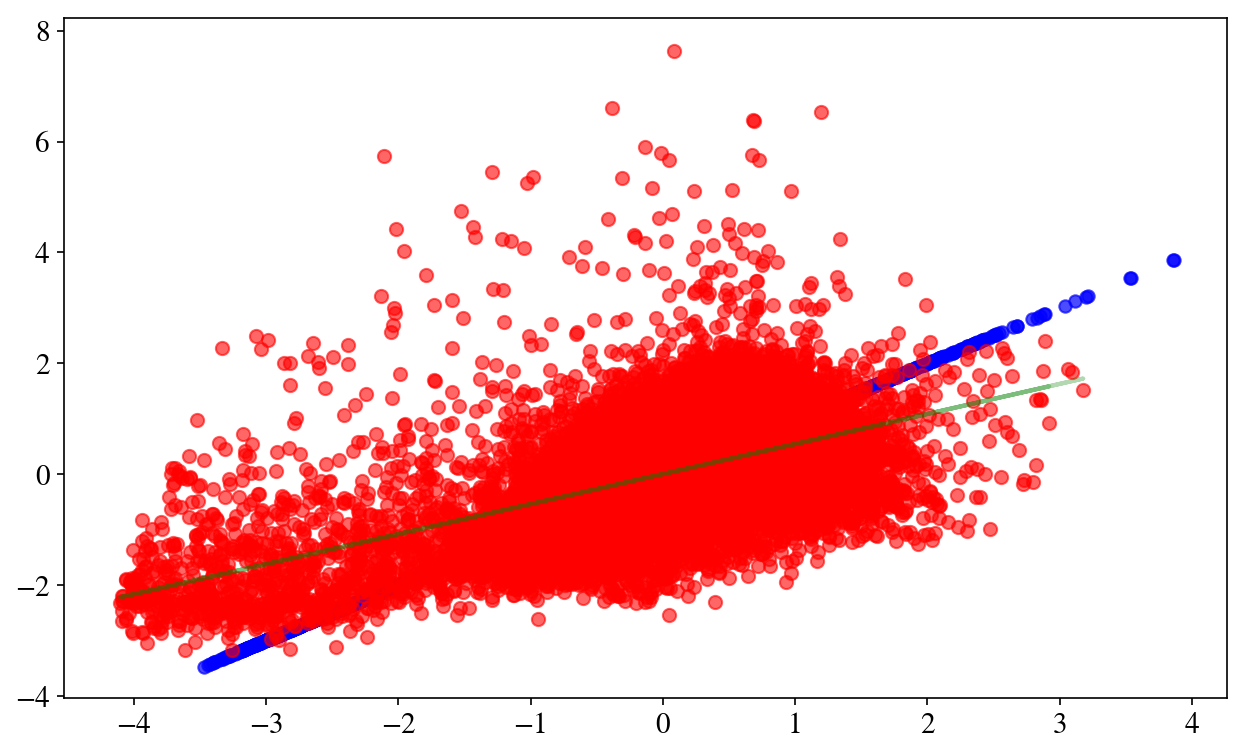

In [98]:
#Instruction14: Plot the reconstructed education(x) and income(y) from the first principal component, in blue.

plt.scatter(X_reconstructed[:,0], X_reconstructed[:,1],c='b', s=35, alpha=0.7);
plt.scatter(radius_std, texture_std_vec, s=40, c='r', alpha=0.6);
plt.plot(trains, predicted_train, c='g', alpha=0.3);
plt.plot(tests, predicted_test, c='g', alpha=0.3);

In [99]:
#Part2: Logistic Regression Instuctions

In [100]:
#Instruction1: Load the array
data=np.array([[ 66.,   0.],
       [ 70.,   1.],
       [ 69.,   0.],
       [ 68.,   0.],
       [ 67.,   0.],
       [ 72.,   0.],
       [ 73.,   0.],
       [ 70.,   0.],
       [ 57.,   1.],
       [ 63.,   1.],
       [ 70.,   1.],
       [ 78.,   0.],
       [ 67.,   0.],
       [ 53.,   1.],
       [ 67.,   0.],
       [ 75.,   0.],
       [ 70.,   0.],
       [ 81.,   0.],
       [ 76.,   0.],
       [ 79.,   0.],
       [ 75.,   1.],
       [ 76.,   0.],
       [ 58.,   1.]])

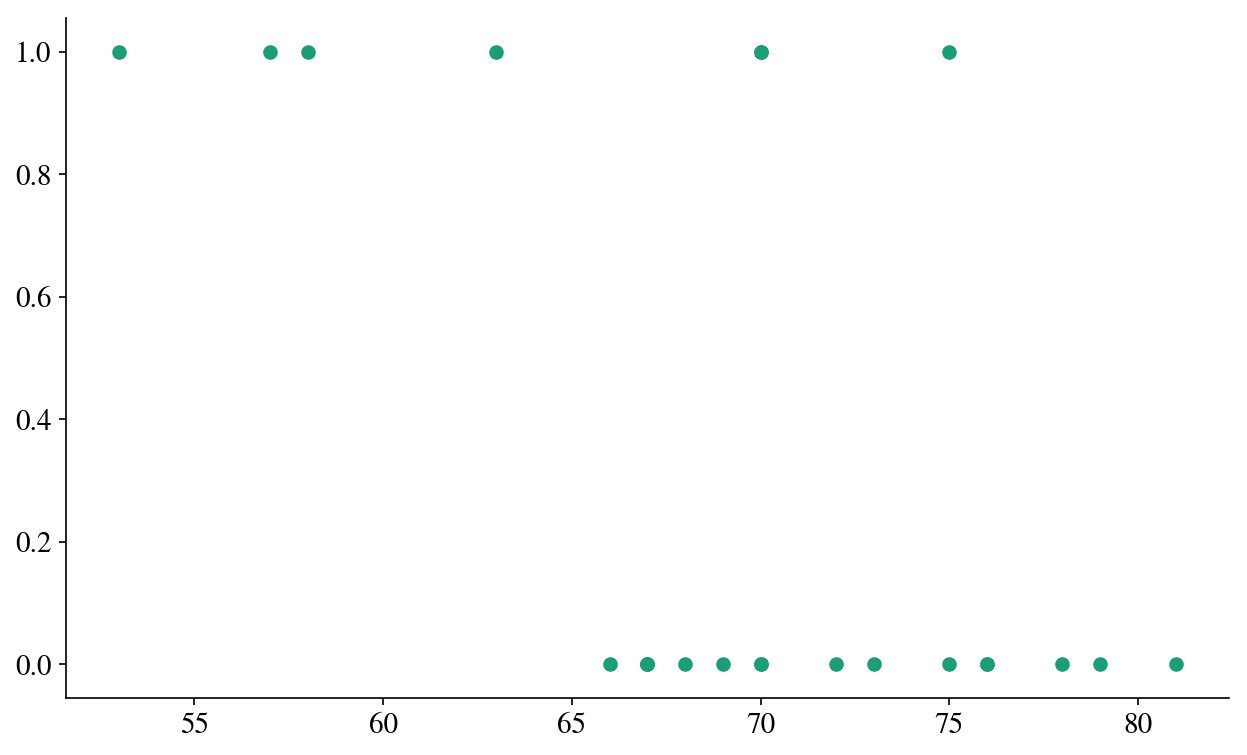

In [101]:
#Instruction2: Plot the array.

temps, pfail = data[:,0], data[:,1]
plt.scatter(temps, pfail)
axes=plt.gca()
axes.grid(False)
remove_border(axes)

In [102]:
#Instruction3: Run Logistic Regression with sklearn.linear_model and set c to 1000.

from sklearn.linear_model import LogisticRegression
reg=1000.
clf4 = LogisticRegression(C=reg)
clf4.fit(temps.reshape(-1,1), pfail)


C:\Users\davei\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [103]:
#Instruction4: Make predictions, get the associated probabilities, and plot them.

tempsnew=np.linspace(20., 90., 15)
probs = clf4.predict_proba(tempsnew.reshape(-1,1))[:, 1]
predicts = clf4.predict(tempsnew.reshape(-1,1))

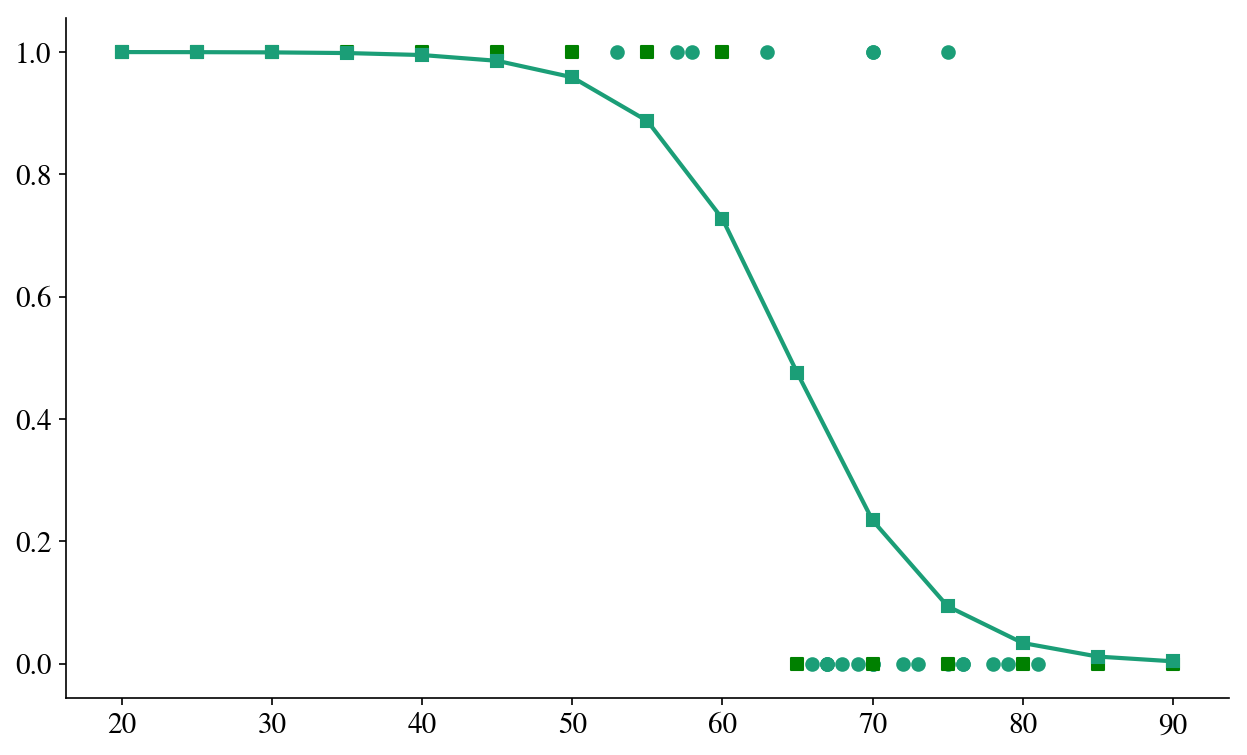

In [104]:
plt.scatter(temps, pfail)
axes=plt.gca()
axes.grid(False)
remove_border(axes)
plt.plot(tempsnew, probs, marker='s')
plt.scatter(tempsnew, predicts, marker='s', color="green")

In [105]:
#Instruction5: use pandas crosstab to write a table of prediction vs failure on the "training" set.

pd.crosstab(pfail, clf4.predict(temps.reshape(-1,1)), rownames=["Actual"], colnames=["Predicted"])

Predicted  0.0  1.0
Actual             
0.0         16    0
1.0          3    4

In [106]:
#Part3: Bias and Variance and Cross Validation


In [108]:
!pip install brewer2mpl

In [110]:
# Instruction1: Load the settings needed for part3

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import brewer2mpl
from matplotlib import rcParams
import brewer2mpl

#colorbrewer2 Dark2 qualitative color table
dark2_cmap = brewer2mpl.get_map('Dark2', 'Qualitative', 7)
dark2_colors = dark2_cmap.mpl_colors

rcParams['figure.figsize'] = (10, 6)
rcParams['figure.dpi'] = 150
# rcParams['axes.color_cycle'] = dark2_colors
rcParams['axes.prop_cycle'] = cycler.cycler(color=dark2_colors)
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'


def remove_border(axes=None, top=False, right=False, left=True, bottom=True):
    """
    Minimize chartjunk by stripping out unnecesasry plot borders and axis ticks
    
    The top/right/left/bottom keywords toggle whether the corresponding plot border is drawn
    """
    ax = axes or plt.gca()
    ax.spines['top'].set_visible(top)
    ax.spines['right'].set_visible(right)
    ax.spines['left'].set_visible(left)
    ax.spines['bottom'].set_visible(bottom)
    
    #turn off all ticks
    ax.yaxis.set_ticks_position('none')
    ax.xaxis.set_ticks_position('none')
    
    #now re-enable visibles
    if top:
        ax.xaxis.tick_top()
    if bottom:
        ax.xaxis.tick_bottom()
    if left:
        ax.yaxis.tick_left()
    if right:
        ax.yaxis.tick_right()
        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
import warnings
warnings.filterwarnings('ignore', message='Polyfit*')

In [111]:
import random
import copy
def scatter_by(df, scatterx, scattery, by=None, figure=None, axes=None, colorscale=dark2_cmap, labeler={}, mfunc=None, setupfunc=None, mms=8):
    cs=copy.deepcopy(colorscale.mpl_colors)
    if not figure:
        figure=plt.figure(figsize=(8,8))
    if not axes:
        axes=figure.gca()
    x=df[scatterx]
    y=df[scattery]
    if not by:
        col=random.choice(cs)
        axes.scatter(x, y, cmap=colorscale, c=col)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            mfunc(axeslist,x,y,color=col, mms=mms)
    else:
        cs=list(np.linspace(0,1,len(df.groupby(by))))
        xlimsd={}
        ylimsd={}
        xs={}
        ys={}
        cold={}
        for k,g in df.groupby(by):
            col=cs.pop()
            x=g[scatterx]
            y=g[scattery]
            xs[k]=x
            ys[k]=y
            c=colorscale.mpl_colormap(col)
            cold[k]=c
            axes.scatter(x, y, c=c, label=labeler.get(k,k), s=40, alpha=0.3);
            xlimsd[k]=axes.get_xlim()
            ylimsd[k]=axes.get_ylim()
        xlims=[min([xlimsd[k][0] for k in xlimsd.keys()]), max([xlimsd[k][1] for k in xlimsd.keys()])]
        ylims=[min([ylimsd[k][0] for k in ylimsd.keys()]), max([ylimsd[k][1] for k in ylimsd.keys()])]
        axes.set_xlim(xlims)
        axes.set_ylim(ylims)
        if setupfunc:
            axeslist=setupfunc(axes, figure)
        else:
            axeslist=[axes]
        if mfunc:
            for k in xs.keys():
                mfunc(axeslist,xs[k],ys[k],color=cold[k], mms=mms);
    axes.set_xlabel(scatterx);
    axes.set_ylabel(scattery);
    
    return axes

def make_rug(axeslist, x, y, color='b', mms=8):
    axes=axeslist[0]
    zerosx1=np.zeros(len(x))
    zerosx2=np.zeros(len(x))
    xlims=axes.get_xlim()
    ylims=axes.get_ylim()
    zerosx1.fill(ylims[1])
    zerosx2.fill(xlims[1])
    axes.plot(x, zerosx1, marker='|', color=color, ms=mms)
    axes.plot(zerosx2, y, marker='_', color=color, ms=mms)
    axes.set_xlim(xlims)
    axes.set_ylim(ylims)
    return axes

In [117]:
#Instruction2: Load your dataset

import pandas as pd
df=pd.read_csv("data/pulsar_stars.csv")
print(len(df.columns))
print(len(df.index))

9
17898


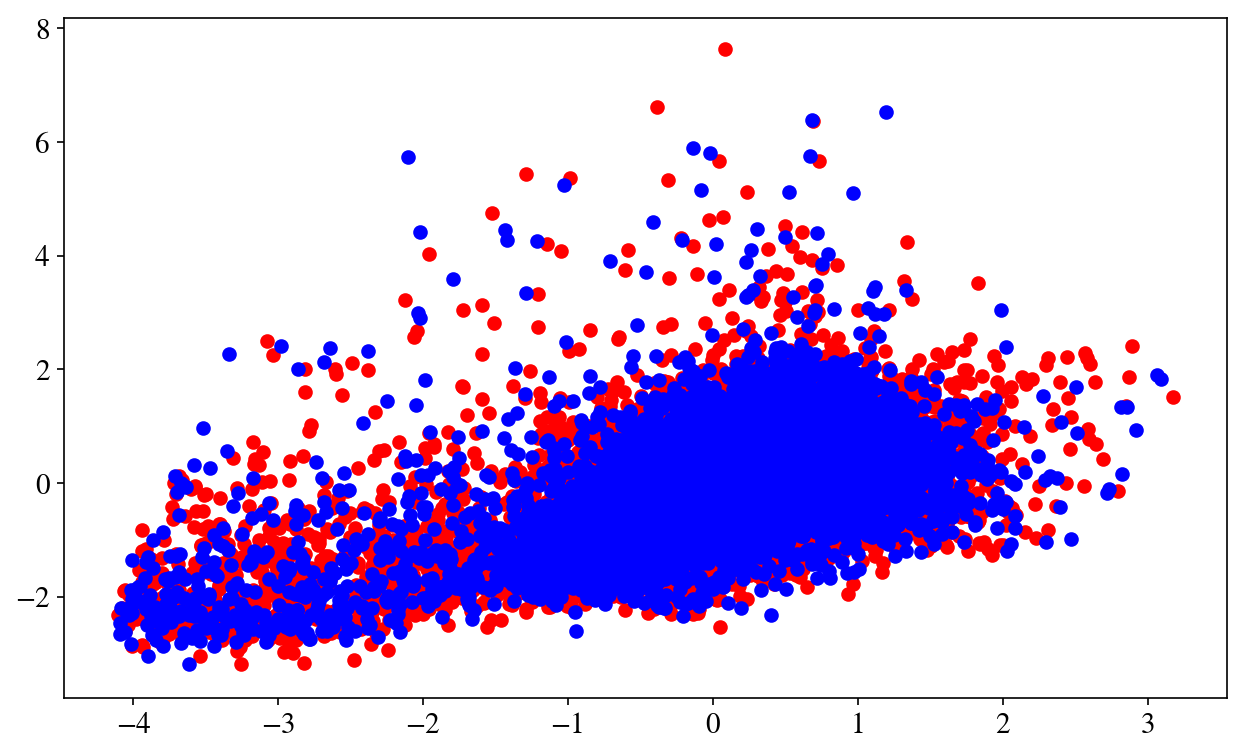

In [118]:
#Instruction3: Split the data set into equal parts test and training using the std vectors from Part1
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(radius_std, texture_std_vec)


# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(radius_std, texture_std_vec, train_size=0.6)
plt.scatter(xtrain, ytrain, color='red');
plt.scatter(xtest, ytest, color='blue');


In [120]:
df = df.rename(columns={'Mean of the integrated profile': 'IP_mean',
                        'Standard deviation of the integrated profile': 'IP_std',
                        'Excess kurtosis of the integrated profile': 'IP_kurt',
                        'Skewness of the integrated profile': 'IP_skew',
                        'Mean of the DM-SNR curve': 'DMSNR_mean',
                        'Standard deviation of the DM-SNR curve': 'DMSNR_std',
                        'Excess kurtosis of the DM-SNR curve': 'DMSNR_kurt',
                        'Skewness of the DM-SNR curve': 'DMSNR_skew',
                        'target_class': 'target'})

In [121]:
#Instruction4: Create a column called "class" and randomly add a "1", "2", or "3" for every row.
#e.g.
#featueA | Class
#--- | ---
#9 | 1
#5 | 2
#7 | 3
#6 | 2
#3 | 1
#6 | 3

df['randNumCol'] = np.random.randint(1, 4, df.shape[0])
print(df.columns)

Index(['IP_mean', 'IP_std', 'IP_kurt', 'IP_skew', 'DMSNR_mean', 'DMSNR_std', 'DMSNR_kurt', 'DMSNR_skew', 'target', 'randNumCol'], dtype='object')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


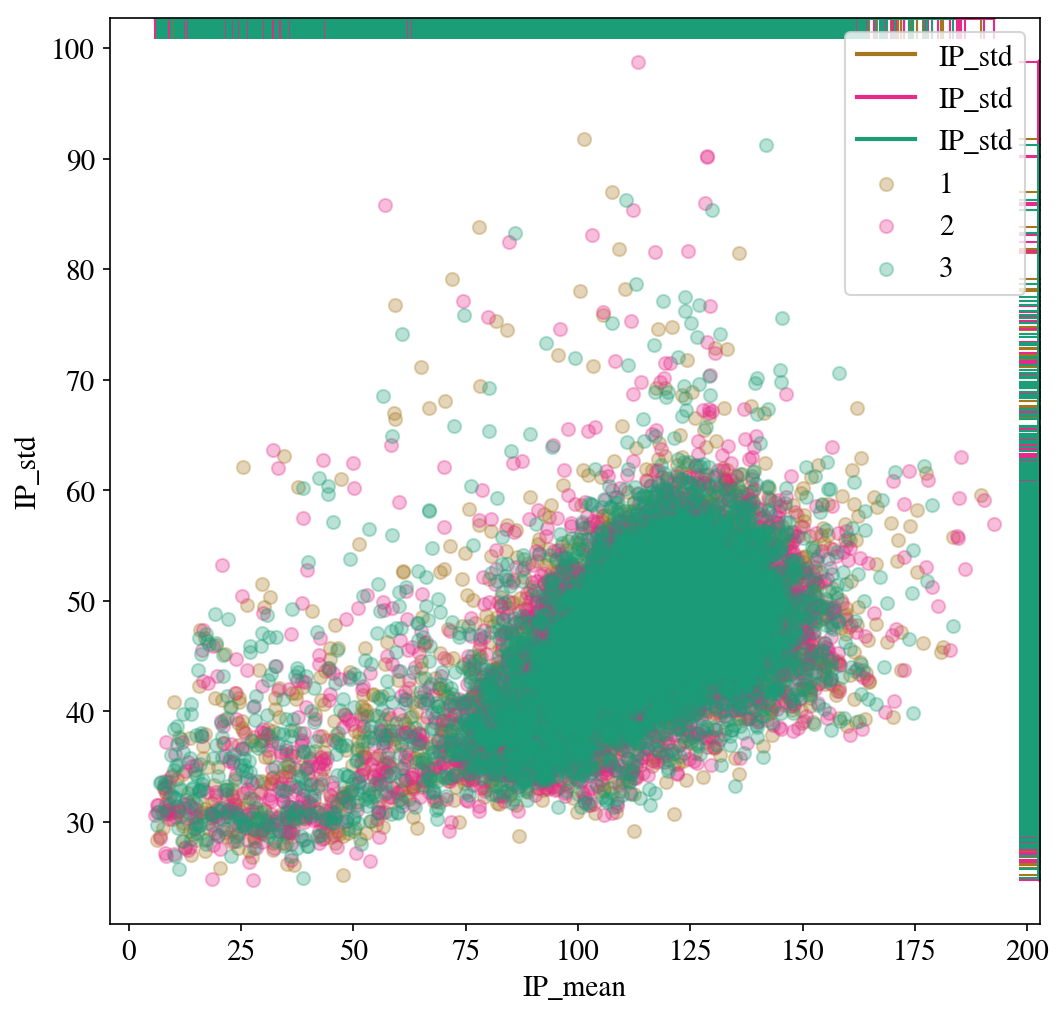

In [123]:
#Instruction5: Choose three different features in your dataset and cluster them by the randomNumCol

akeys=[1,2,3]
avals=['1','2','3']
amap={e[0]:e[1] for e in zip(akeys,avals)}
ax=scatter_by(df, 'IP_mean', 'IP_std', by='randNumCol', labeler=amap, mfunc=make_rug, mms=20)
ax.grid(False)
ax.legend(loc='upper right');


In [124]:
#Instructin6: Add plotting settings
from matplotlib.colors import ListedColormap
#cm_bright = ListedColormap(['#FF0000', '#000000','#0000FF'])
#cm = plt.cm.RdBu
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def points_plot(X, Xtr, Xte, ytr, yte, clf, colorscale=cmap_light, cdiscrete=cmap_bold):
    h = .02
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                         np.linspace(y_min, y_max, 50))

    plt.figure()
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, alpha=0.2)
    plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cdiscrete, s=50, alpha=0.2,edgecolor="k")
    # and testing points
    yact=clf.predict(Xte)
    print ("SCORE"), clf.score(Xte, yte)
    plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cdiscrete, alpha=0.5, marker="s", s=35)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    return ax

In [126]:
#Instruction7: Develop a kNN with 20 neighbors
from sklearn.neighbors import KNeighborsClassifier
subdf=df[['IP_mean','IP_std']]
subdfstd=(subdf - subdf.mean())/subdf.std()
X=subdfstd.values
y=df['randNumCol'].values
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.6)
Xtr=np.concatenate((Xtrain, Xtest))

SCORE


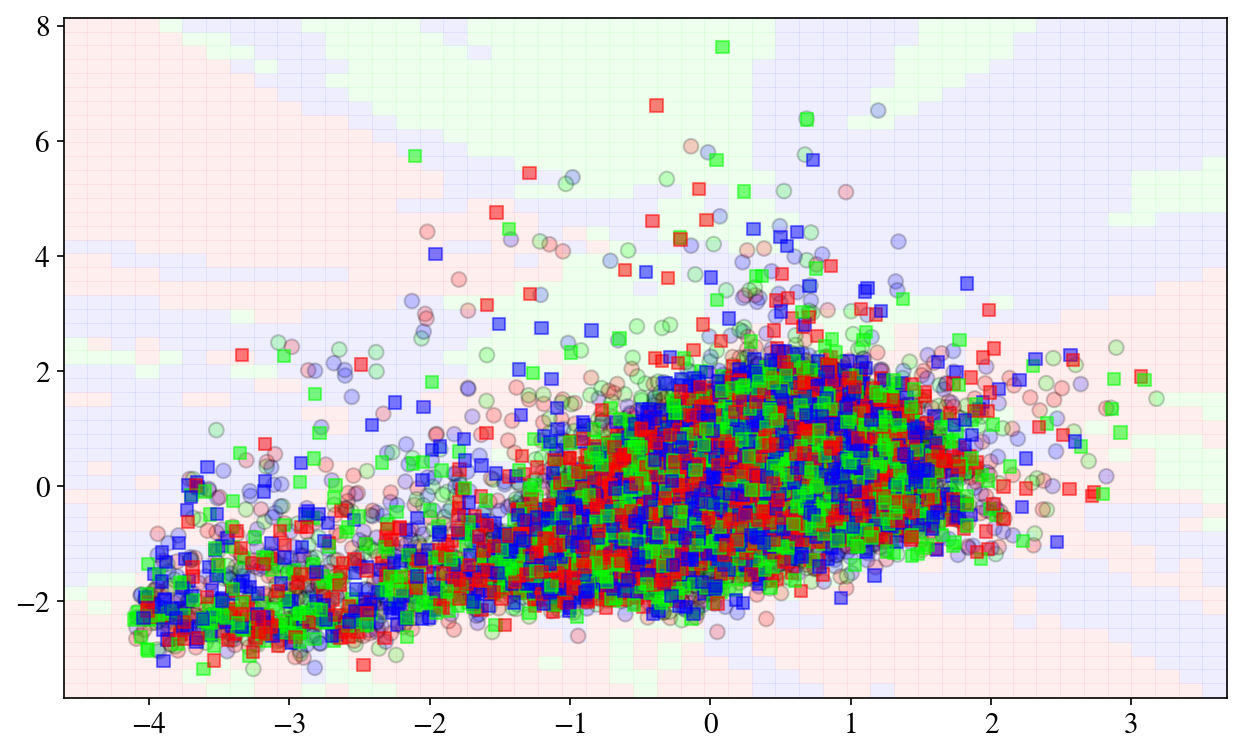

In [127]:
#Instruction8: Plot the kNN model with 20 neighbors

clf = KNeighborsClassifier(20).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

SCORE


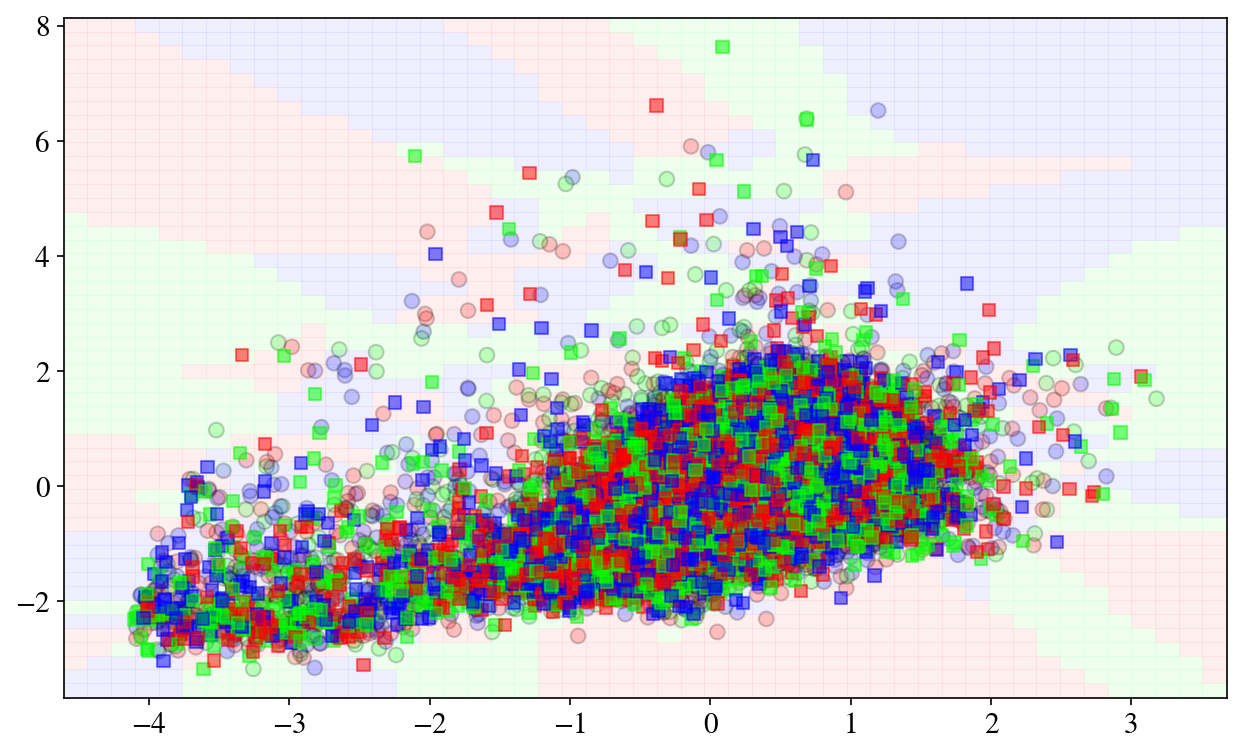

In [128]:
##Instruction9: Plot the kNN model with 1 neighbors

clf = KNeighborsClassifier(1).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

SCORE


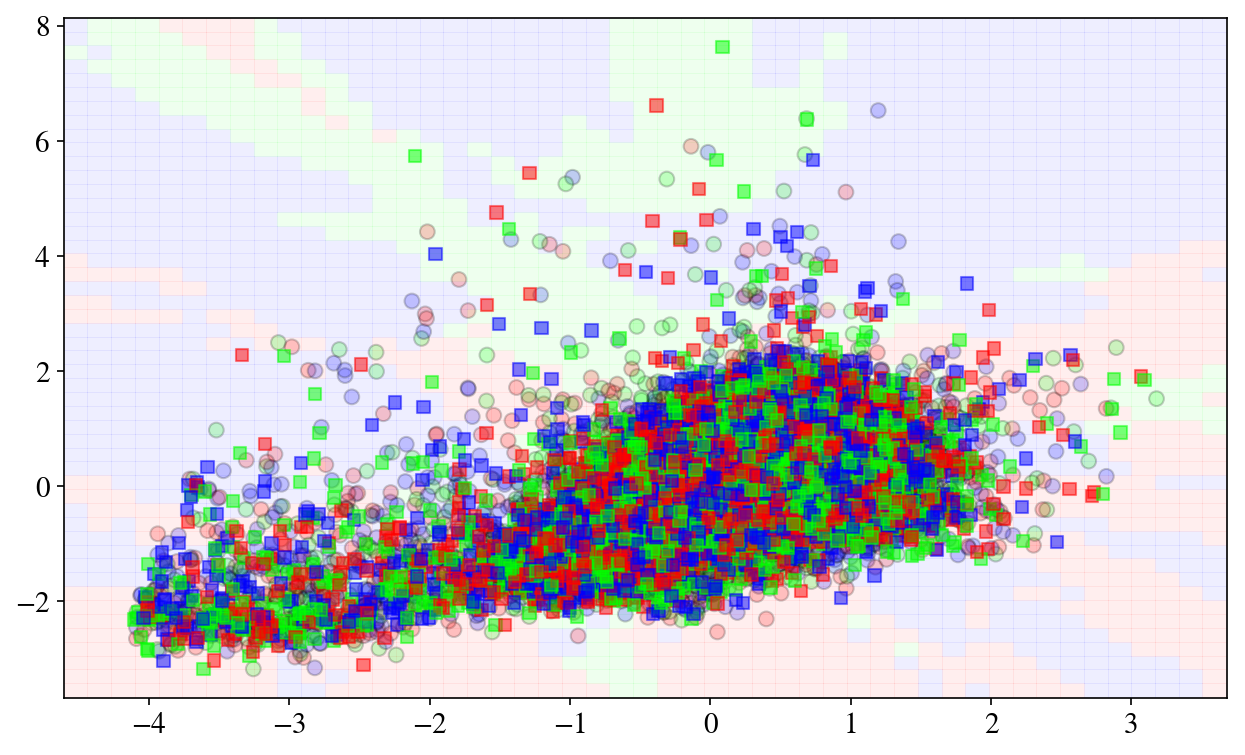

In [129]:
##Instruction10: Plot the kNN model with 35 neighbors
clf = KNeighborsClassifier(35).fit(Xtrain, ytrain)
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, clf)

C:\Users\davei\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


(10738,) (3580,) (3580,)
0.32206703910614526


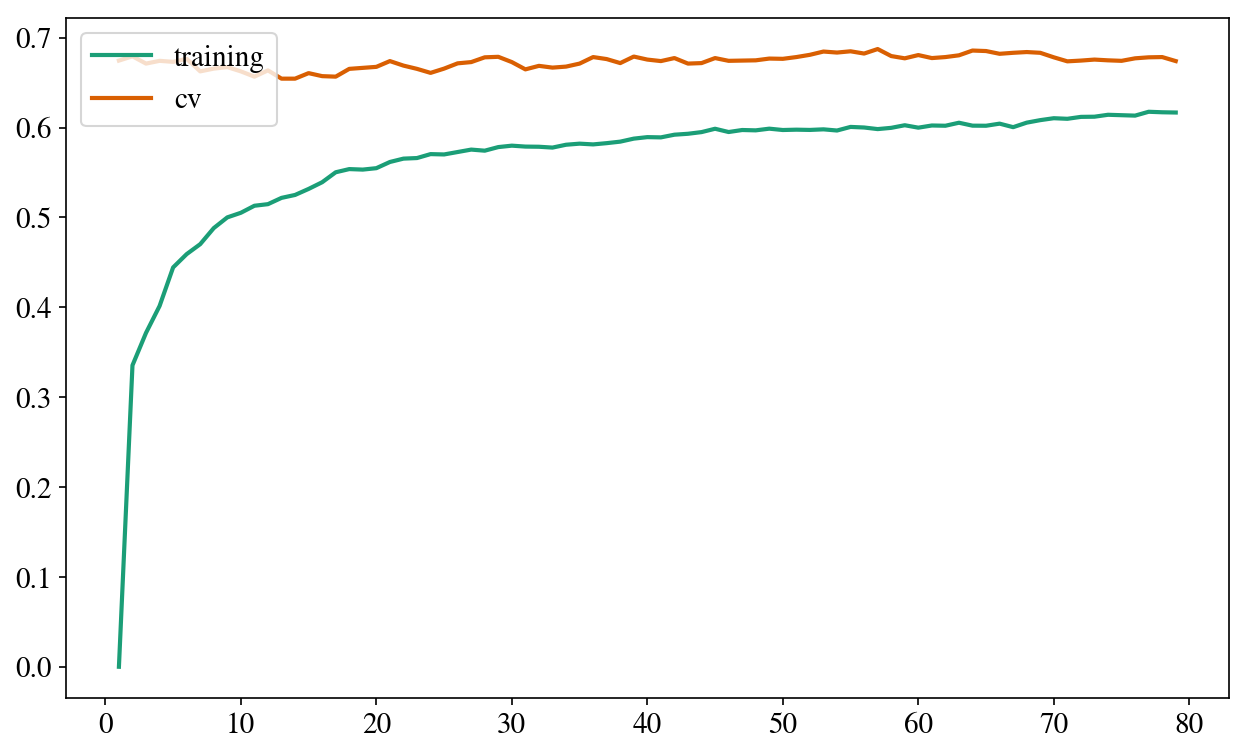

In [130]:
#Instruction#11: Develop an a KNN classifier 
Xcv,Xte,ycv,yte=train_test_split(Xtest, ytest, train_size=0.5)
print (ytrain.shape, ycv.shape, yte.shape)
trscores=[]
cvscores=[]
ns=np.arange(1,80,1)
ones=np.ones(len(ns))
for n in ns:
    clf = KNeighborsClassifier(n).fit(Xtrain, ytrain)
    trscores.append(clf.score(Xtrain, ytrain))
    cvscores.append(clf.score(Xcv, ycv))
plt.plot(ns, ones-trscores, label="training")
plt.plot(ns, ones-cvscores, label="cv")
plt.legend(loc='upper left');
print (clf.score(Xte, yte))

In [132]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
Xtr=np.concatenate((Xtrain, Xtest))

In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
parameters = {"n_neighbors": np.arange(1,80,1)}
clf = KNeighborsClassifier()
gs = GridSearchCV(clf, param_grid=parameters, cv=10)
gs.fit(Xtrain, ytrain)
#print gs.grid_scores_
print (gs.best_params_, gs.best_score_)
y_true, y_pred = ytest, gs.predict(Xtest)
print(classification_report(y_true, y_pred))


{'n_neighbors': 65} 0.3408995669786283
              precision    recall  f1-score   support

           1       0.32      0.38      0.35      1168
           2       0.35      0.32      0.33      1213
           3       0.34      0.31      0.33      1199

   micro avg       0.34      0.34      0.34      3580
   macro avg       0.34      0.34      0.34      3580
weighted avg       0.34      0.34      0.34      3580



SCORE


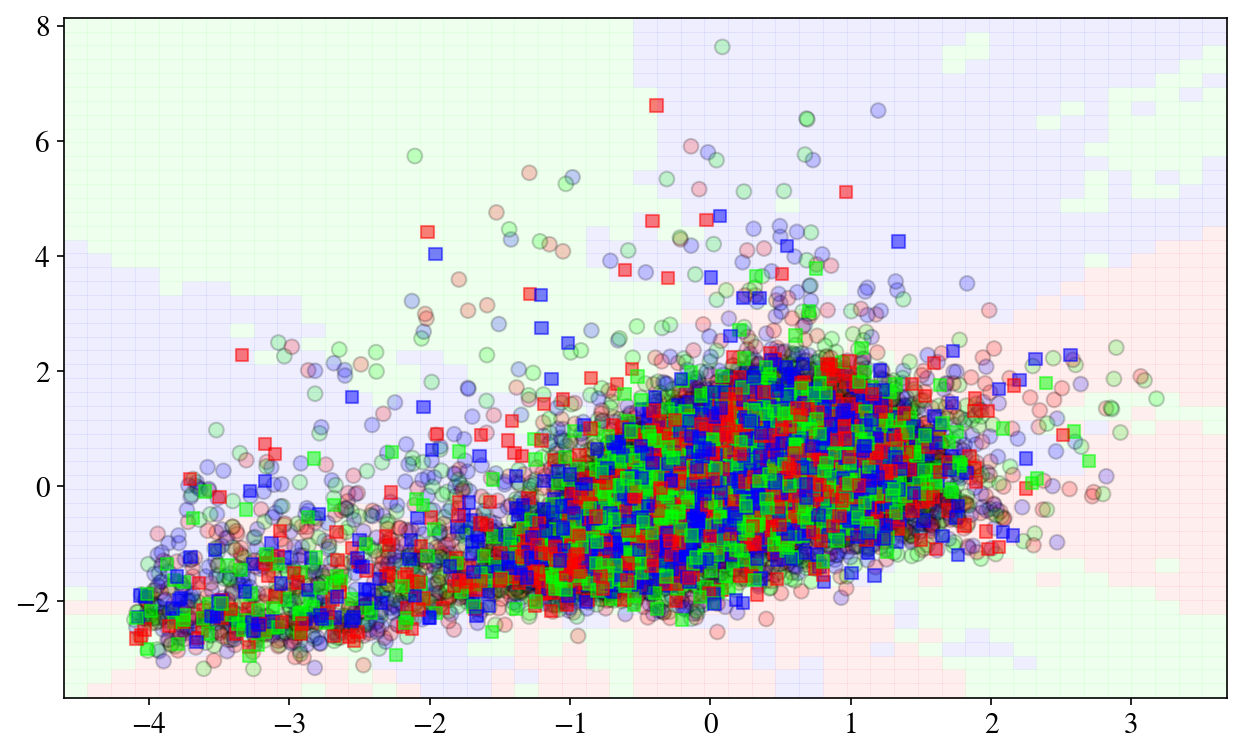

In [137]:
points_plot(Xtr, Xtrain, Xtest, ytrain, ytest, gs)